<a href="https://colab.research.google.com/github/arahmanmdmajid/DS_AI_11/blob/main/Deep_Learning_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam

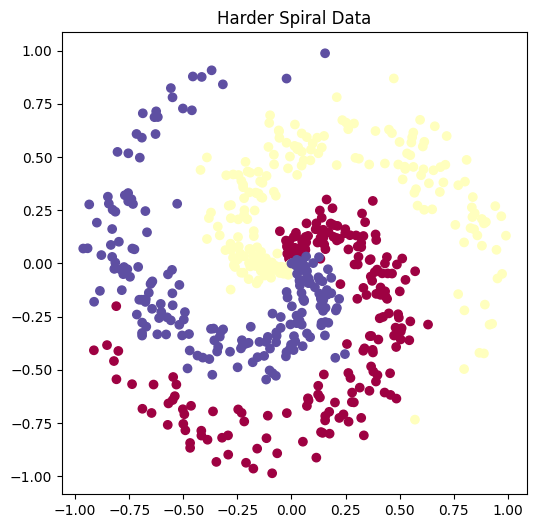

In [123]:
def generate_harder_spiral_data(points_per_class=200, noise=0.4, num_classes=3):
    N = points_per_class  # points per class
    D = 2                 # input dimension
    K = num_classes       # number of classes
    X = np.zeros((N*K,D))
    y = np.zeros(N*K, dtype='uint8')
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X, y

# Generate data
X, y = generate_harder_spiral_data()

# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")
plt.title('Harder Spiral Data')
plt.show()


In [124]:
# Split data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 2), (120, 2), (480,), (120,))

In [126]:
# Build the MLP model
model_relu = Sequential([
    InputLayer(shape=(2,)),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
    # # Input layer and first hidden layer
    # Dense(units=64, input_shape=(X_train.shape[1],), activation='relu'),
    # # Second hidden layer
    # Dense(units=64, activation='relu'),
    # # Output layer
    # Dense(units=3, activation='softmax')  # 3 classes for the spiral data
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_relu.compile(optimizer=optimizer,
              # loss='sparse_categorical_crossentropy',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_relu.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [127]:
history_relu = model_relu.fit(X_train, y_train, validation_split=0.2, epochs=300, verbose=1)

Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3595 - loss: 0.6745 - val_accuracy: 0.3125 - val_loss: 0.6546
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3525 - loss: 0.6630 - val_accuracy: 0.3125 - val_loss: 0.6405
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3485 - loss: 0.6475 - val_accuracy: 0.3125 - val_loss: 0.6262
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3307 - loss: 0.6475 - val_accuracy: 0.3125 - val_loss: 0.6119
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3362 - loss: 0.6222 - val_accuracy: 0.3125 - val_loss: 0.5962
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3359 - loss: 0.6091 - val_accuracy: 0.3125 - val_loss: 0.5805
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3362 - loss: 0.5735 - val_accuracy: 0.3125 - val_loss: 0.5640
Epoch 8/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3235 - loss: 0.5880 - val_accuracy: 0.31

In [128]:
y_pred_relu = (model_relu.predict(X_test) > 0.5).astype("int32")
print("MLP with ReLU Accuracy:", accuracy_score(y_test, y_pred_relu))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MLP with ReLU Accuracy: 0.3333333333333333


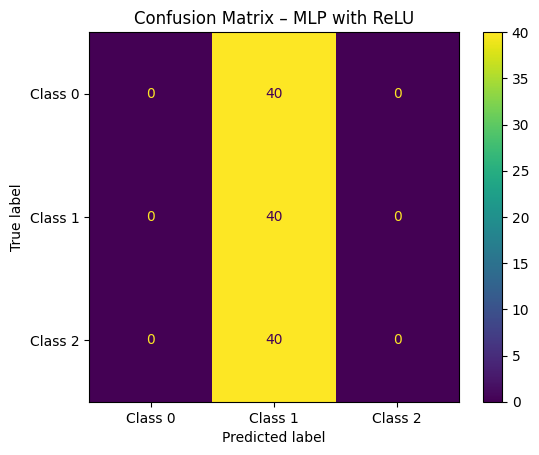

In [129]:
# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_relu), display_labels=["Class 0", "Class 1", "Class 2"]).plot()
plt.title("Confusion Matrix – MLP with ReLU")
plt.show()

2757/2757 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


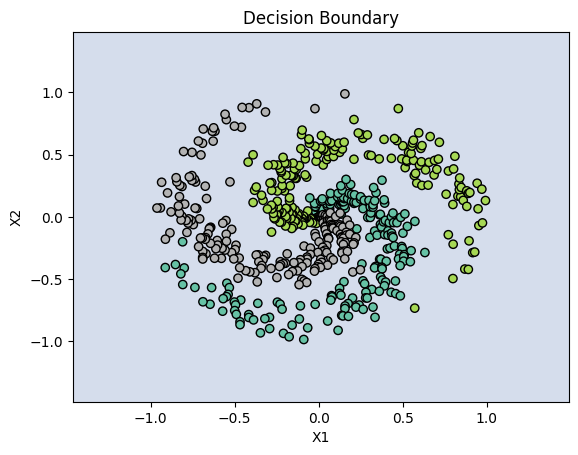

In [130]:
plot_decision_boundary(model_relu, X, y)

In [131]:
mlp_relu_2 = Sequential([
    InputLayer(shape=(2,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_relu_2.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

mlp_relu_2.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

In [132]:
history_relu_2 = mlp_relu_2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    verbose=0
)

In [133]:
# Predict
y_pred_relu_2 = (mlp_relu_2.predict(X_test) > 0.5).astype("int32")
print("MLP with Single Hidden Layer: Accuracy:", accuracy_score(y_test, y_pred_relu_2))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MLP with Single Hidden Layer: Accuracy: 0.3333333333333333


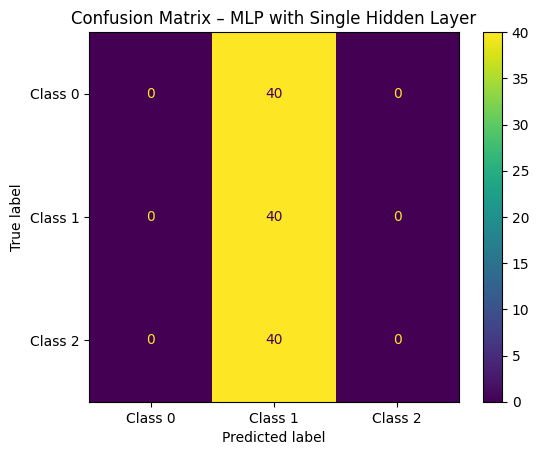

In [134]:
# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_relu_2), display_labels=["Class 0", "Class 1", "Class 2"]).plot()
plt.title("Confusion Matrix – MLP with Single Hidden Layer")
plt.show()

2757/2757 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


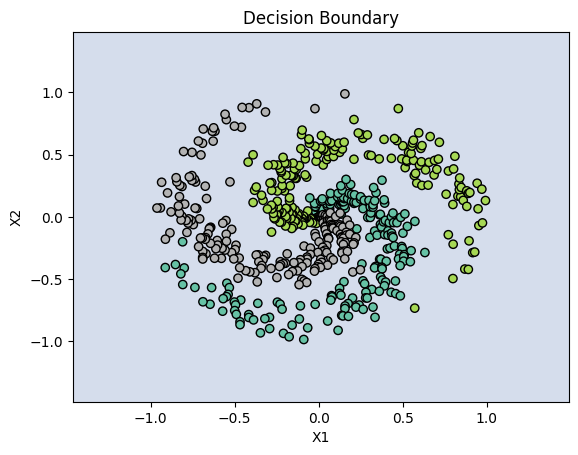

In [135]:
plot_decision_boundary(mlp_relu_2, X, y)

In [136]:
mlp_relu_3 = Sequential([
    InputLayer(shape=(2,)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_relu_3.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

mlp_relu_3.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,137 (4.44 KB)

 Trainable params: 1,137 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
history_relu_3 = mlp_relu_3.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    verbose=0
)

In [138]:
# Predict
y_pred_relu_3 = (mlp_relu_3.predict(X_test) > 0.5).astype("int32")
print("MLP with More Complexity: Accuracy:", accuracy_score(y_test, y_pred_relu_3))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MLP with More Complexity: Accuracy: 0.35


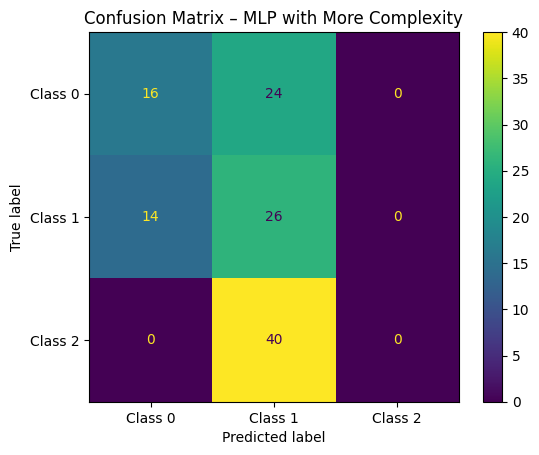

In [139]:
# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_relu_3), display_labels=["Class 0", "Class 1", "Class 2"]).plot()
plt.title("Confusion Matrix – MLP with More Complexity")
plt.show()

2757/2757 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


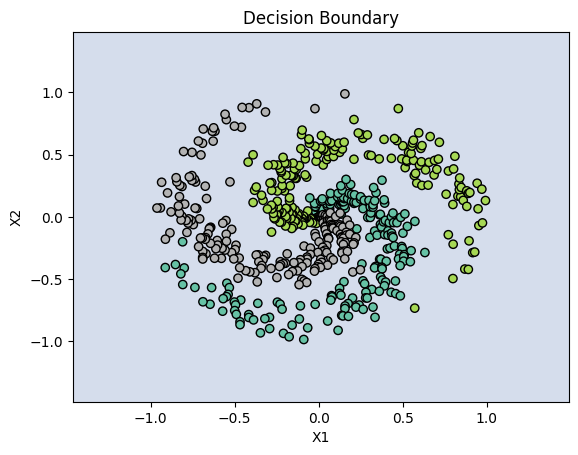

In [140]:
plot_decision_boundary(mlp_relu_3, X, y)

In [141]:
# Build the MLP model
mlp_relu_4 = Sequential([
    InputLayer(shape=(2,)),
    # Input layer and first hidden layer
    Dense(32, activation='relu'),
    # Second hidden layer
    Dense(64, activation='relu'),
    # Third hidden layer
    Dense(32, activation='relu'),
    # Output layer
    Dense(3, activation='softmax')
])

# Compile the model

mlp_relu_4.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

mlp_relu_4.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,387 (17.14 KB)

 Trainable params: 4,387 (17.14 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
history_relu_4 = mlp_relu_4.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    verbose=0
)

In [143]:
# Predict
y_pred_relu_4 = np.argmax(mlp_relu_4.predict(X_test), axis=1)
print("MLP with More Complexity: Accuracy:", accuracy_score(y_test, y_pred_relu_4))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MLP with More Complexity: Accuracy: 0.9833333333333333


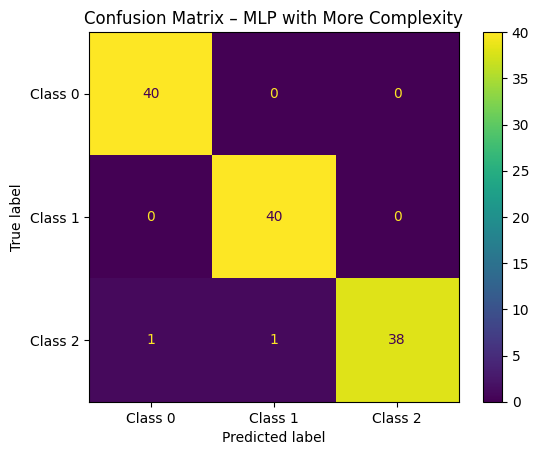

In [144]:
# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_relu_4), display_labels=["Class 0", "Class 1", "Class 2"]).plot()
plt.title("Confusion Matrix – MLP with More Complexity")
plt.show()

In [145]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid)
    probs = np.argmax(probs, axis=1)
    probs = probs.reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='Pastel2', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set2', edgecolor='k')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

2757/2757 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


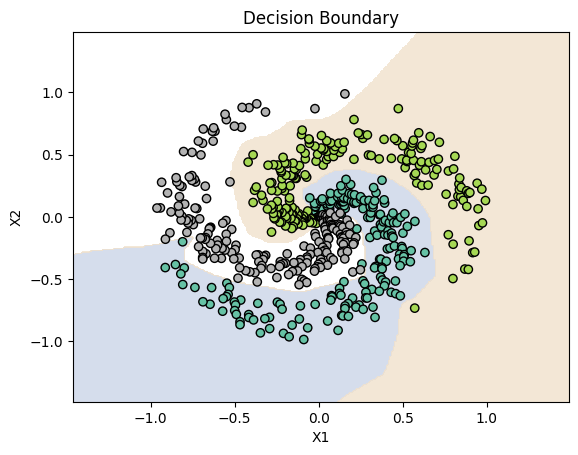

In [146]:
plot_decision_boundary(mlp_relu_4, X, y)

##Questions
**How did you decide the number of hidden layers and neurons?**

Hidden layers and neurons were chosen through experimentation with different configurations to find a balance between complexity and performance on this specific spiral dataset.

**How did different learning rates affect the results?**

Higher learning rates (e.g., 0.01) are generally faster, while lower rates (e.g., 0.001) are slower but can give more better results. The optimal rate also depended on the model complexity.

**Did you encounter overfitting or underfitting? How did you deal with it?**

The models with fewer parameters initially underfitted but adding layers/neurons helped. Complex models with higher learning rates showed signs of overfitting.

**If you had more time, how would you further improve the model?**

To further improve we can use hyperparameter tuning or more complex models if necessary.